# CSE 151A Group Project

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

## Data Exploration

Start by loading in the dataset. Since the reviews csv doesn't provide anything aside from the fact that a certain location id got reviewed by a certain user id, we opted to not use it. 

In [2]:
listings_df = pd.read_csv('Listings.csv', encoding='ISO-8859-1')
listings_df.head()

<ipython-input-2-b2afbce54987>:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv('Listings.csv', encoding='ISO-8859-1')


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


Let's start by looking at the shape of the dataset.

In [3]:
listings_df.shape

(279712, 33)

We have 279712 locations, each with 33 variables associated with them. 

Let's start by taking a look at what each column means.

In [4]:
listings_info = pd.read_csv('Listings_data_dictionary.csv', encoding='ISO-8859-1')
listings_info

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


Now that we have a look at what each column means, let's start by dropping every column that couldn't possibly be used to predict the rating of the listing.

We'll also drop any columns that are associated with the rating, because that information is not available at the time of booking.

In [5]:
listings_df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [6]:
unusable_cols = ["listing_id","name","host_id"]
unavailable_cols = ['review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication',
                    'review_scores_location', 'review_scores_value']

listings_df = listings_df.drop(unusable_cols,axis=1)
listings_df = listings_df.drop(unavailable_cols,axis=1)
listings_df.columns

Index(['host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'district', 'city',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'instant_bookable'],
      dtype='object')

Next, we're going to take a look at the missing values in the dataset.

In [7]:
for column in listings_df.columns:
    print(column + ": " + str(listings_df[column].isna().sum()) + " missing values")

host_since: 165 missing values
host_location: 840 missing values
host_response_time: 128782 missing values
host_response_rate: 128782 missing values
host_acceptance_rate: 113087 missing values
host_is_superhost: 165 missing values
host_total_listings_count: 165 missing values
host_has_profile_pic: 165 missing values
host_identity_verified: 165 missing values
neighbourhood: 0 missing values
district: 242700 missing values
city: 0 missing values
latitude: 0 missing values
longitude: 0 missing values
property_type: 0 missing values
room_type: 0 missing values
accommodates: 0 missing values
bedrooms: 29435 missing values
amenities: 0 missing values
price: 0 missing values
minimum_nights: 0 missing values
maximum_nights: 0 missing values
review_scores_rating: 91405 missing values
instant_bookable: 0 missing values


The first thing we noticed was that many of the host columns had the same number of missing values, which we guessed meant that AirBNB simply didn't have information on those hosts. Let's verify this.

In [8]:
missing_165 = ['host_since', 'host_is_superhost', 'host_total_listings_count', "host_has_profile_pic", "host_identity_verified"]
missing_count = listings_df[listings_df[missing_165].isna().all(axis=1)].shape[0]

print(missing_count == 165)

True


Great. We're going to delete all rows that have missing data in all of these columns, as we think that sacrificing such a small fraction of the dataset for additional variables is worthwhile.

In [9]:
listings_df = listings_df[listings_df[missing_165].isna().all(axis=1) == False]
listings_df.shape

(279547, 24)

We also decided that due to the amount of missing values in host response times, host response rates, district, and host acceptance rates, we should omit those variables.

In [10]:
listings_df = listings_df.drop(columns=['host_response_time','host_response_rate', 'host_acceptance_rate', "district"])

Bedrooms was a tough decision given the amount of missing data, but we opted to drop all rows where the number of bedrooms was missing, considering that it'd be tough to make a decision on booking an AirBNB without its number of bedrooms. More on this later.

In [11]:
listings_df = listings_df[listings_df["bedrooms"].isna() == False]

We decided latitude and longitude would be redundant when city is already provided, so we dropped that variable. We'll also drop neighborhood, as we feel it's unlikely to have enough data points for each neighborhood to be of use.

In [12]:
listings_df = listings_df.drop(columns=["latitude","longitude", "neighbourhood"])

We'll also drop host_location, as we don't see it being effective in predicting rating.

In [13]:
listings_df = listings_df.drop(columns=["host_location"])

Finally, we're also going to have to drop all rows where review_scores_rating is null, as this is the variable we need to predict.

In [14]:
listings_df = listings_df[listings_df["review_scores_rating"].isna() == False]

Great, now we have eliminated all of our missing values.

In [15]:
for column in listings_df.columns:
    print(column + ": " + str(listings_df[column].isna().sum()) + " missing values")

host_since: 0 missing values
host_is_superhost: 0 missing values
host_total_listings_count: 0 missing values
host_has_profile_pic: 0 missing values
host_identity_verified: 0 missing values
city: 0 missing values
property_type: 0 missing values
room_type: 0 missing values
accommodates: 0 missing values
bedrooms: 0 missing values
amenities: 0 missing values
price: 0 missing values
minimum_nights: 0 missing values
maximum_nights: 0 missing values
review_scores_rating: 0 missing values
instant_bookable: 0 missing values


In [16]:
listings_df.shape

(168414, 16)

We're now down to 168414 entries with 17 variables. Let's walk through the design rationale for each column:

- host_since -- we want the amount of time a host has been active, as we think this would've given them time to adjust their properties to be of higher quality.
- All other host variables -- gives us a decent idea of the quality of the host.
- city -- gives us a good idea of their rough location.
- property_type and room_type -- the type of housing may affect how well they're generally rated
- accomodates / bedrooms -- the size of the AirBNB might follow general trends in rating
- amenities -- gives us the added benefits, which may add a convenience that'll boost rating.
- price -- rating may be correlated with pricing, one way or another
- minimum_nights and maximum_nights -- we think that this'll add to or subtract from the convenience for the user, leading to correlation with rating
- instant_bookable -- same as above.

Now, let's begin by evaluating for preprocessing.

In [17]:
listings_df.head()

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,instant_bookable
0,2011-12-03,f,1.0,t,f,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,f
1,2013-11-29,f,1.0,t,t,Paris,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,f
2,2014-07-31,f,1.0,t,f,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,f
3,2013-12-17,f,1.0,t,t,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,f
4,2014-12-14,f,1.0,t,f,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,f


It's important to pay attention to what "price" is defined as:

*Listing price (in each country's currency)*

Uh oh! This field is essentially useless without context about which currency is being referred to. Luckily, this dataframe contains information about the listing's City, and from there we can evaluate the listing's price in a common currency using exchange rates.

In [18]:
listings_df['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney', 'Rome',
       'Hong Kong', 'Istanbul', 'Mexico City', 'Cape Town'], dtype=object)

Fortunately, there are only 10 cities in our dataset. This is small enough such that we can manually scale the price of each city's listing. We will be using USD as our common currency, since many countries depend on our financial system and have their currencies' value pegged to the USD.

In [19]:
keys = ['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney', 'Rome',
       'Hong Kong', 'Istanbul', 'Mexico City', 'Cape Town']
values = [1.08, 1, 0.028, 0.2, 0.65, 1.08, 0.13, 0.3, 0.059, 0.053]

for i, city in enumerate(keys):
    mask = listings_df['city'] == city
    listings_df.loc[mask, 'price'] *= values[i]

listings_df.head()

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,instant_bookable
0,2011-12-03,f,1.0,t,f,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",57.24,2,1125,100.0,f
1,2013-11-29,f,1.0,t,t,Paris,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",129.60,2,1125,100.0,f
2,2014-07-31,f,1.0,t,f,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",96.12,2,1125,100.0,f
3,2013-12-17,f,1.0,t,t,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",62.64,2,1125,100.0,f
4,2014-12-14,f,1.0,t,f,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",64.80,2,1125,100.0,f


Note that some currencies, like the Turkish lira, have fluctuated greatly in value in the past 10 years. For now, we took the average of each currency's valuation over that time period. We will look into incorporating datasets for historical foreign exchange rates to scale the listing prices as a way to improve our methodology.

First, since we want host_since to represent the amount of time the host has been active, we'll convert from datetime to a straight integer by subtracting it from the current date.

In [20]:
listings_df["host_since"] = pd.to_datetime(listings_df["host_since"])
listings_df["host_since"] = listings_df["host_since"].apply(lambda x: dt.datetime.now() - x)
listings_df["host_since"] = listings_df["host_since"].apply(lambda x: x.days)

Next, we'll convert all columns consisting of t's and f's to 1's and 0's such that it can be more easily used by ML models.

In [21]:
tf_cols = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable"]
listings_df[tf_cols] = listings_df[tf_cols].replace({'t': 1, 'f': 0})

Next, we'll one-hot encode all of the categorical variables with the exception of amenities.

In [22]:
cat_cols = ["property_type", "room_type", "city"]
listings_df = pd.get_dummies(listings_df, columns=cat_cols, dtype=int)

Then we will find all of the different amenities offered and choose the top 100 to check for existence in provided amenities

In [23]:
amenities = {}

for item in listings_df['amenities']:
    # Separate all all of the amenities for the row
    amens = item.strip('[]').split(',')
    for idx in range(len(amens)):
        # Increase the count of the amenity in the dictionary
        amens[idx] = amens[idx].strip(' "')
        amenities[amens[idx]] = amenities.get(amens[idx],0) + 1
# Find the top 100 amenities
result = list(amenities.items())
result.sort(reverse=True, key=lambda x: x[1])
result[:100]


[('Wifi', 160938),
 ('Essentials', 157852),
 ('Kitchen', 148161),
 ('Long term stays allowed', 146193),
 ('Hangers', 135859),
 ('TV', 130859),
 ('Hair dryer', 124085),
 ('Iron', 123092),
 ('Hot water', 117817),
 ('Dedicated workspace', 117344),
 ('Heating', 115566),
 ('Washer', 114897),
 ('Shampoo', 113683),
 ('Smoke alarm', 99861),
 ('Dishes and silverware', 96346),
 ('Refrigerator', 94820),
 ('Air conditioning', 87001),
 ('Cooking basics', 85488),
 ('Microwave', 77364),
 ('Bed linens', 74422),
 ('Stove', 73215),
 ('Coffee maker', 69705),
 ('Oven', 65895),
 ('Elevator', 63744),
 ('Fire extinguisher', 62999),
 ('Dryer', 58849),
 ('First aid kit', 55427),
 ('Carbon monoxide alarm', 53918),
 ('Extra pillows and blankets', 48608),
 ('Free street parking', 47041),
 ('Private entrance', 44749),
 ('Cable TV', 44138),
 ('Luggage dropoff allowed', 43332),
 ('Free parking on premises', 42819),
 ('Host greets you', 40563),
 ('Patio or balcony', 40189),
 ('Dishwasher', 35759),
 ('Lock on bedroom 

In [24]:
# Add them each into the dataframe
amenities_df = pd.DataFrame()
for item in result[:100]:
    amenities_df[item[0]] = listings_df['amenities'].str.contains(item[0]).astype(int)
listings_df = pd.concat([listings_df,amenities_df],axis=1)

In [25]:
listings_df

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,amenities,price,minimum_nights,...,Bathroom essentials,Baby safety gates,Bread maker,Clothing storage,Full kitchen,Fireplace guards,Sound system,EV charger,Outdoor furniture,Lake access
0,4453,0,1.0,1,0,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",57.24,2,...,0,0,0,0,0,0,0,0,0,0
1,3726,0,1.0,1,1,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",129.60,2,...,0,0,0,0,0,0,0,0,0,0
2,3482,0,1.0,1,0,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",96.12,2,...,0,0,0,0,0,0,0,0,0,0
3,3708,0,1.0,1,1,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",62.64,2,...,0,0,0,0,0,0,0,0,0,0
4,3346,0,1.0,1,0,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",64.80,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,3226,0,1.0,1,1,2,1.0,"[""Iron"", ""Heating"", ""Washer"", ""Dedicated works...",129.60,1,...,0,0,0,0,0,0,0,0,0,0
279708,3728,0,1.0,1,1,2,1.0,"[""Shampoo"", ""Iron"", ""Heating"", ""Washer"", ""Hair...",64.80,7,...,0,0,0,0,0,0,0,0,0,0
279709,4307,0,1.0,1,1,2,1.0,"[""Paid parking off premises"", ""Shampoo"", ""Firs...",54.00,6,...,0,0,0,0,0,0,0,0,0,0
279710,3132,0,1.0,1,1,2,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Hangers"", ""Smoke al...",113.40,3,...,0,0,0,0,0,0,0,0,0,0


Now let's separate the data we will use as input (still needs to be normalized) and also get the output data

In [26]:
# Get input dataframe
input_df = listings_df.iloc[:,(listings_df.columns != 'amenities') & (listings_df.columns != 'review_scores_rating')]
input_df.describe()

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,price,minimum_nights,maximum_nights,...,Bathroom essentials,Baby safety gates,Bread maker,Clothing storage,Full kitchen,Fireplace guards,Sound system,EV charger,Outdoor furniture,Lake access
count,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000,1.684140e+05,...,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000,168414.000000
mean,2972.914502,0.247462,9.384867,0.998272,0.780351,3.456524,1.497411,110.314154,7.068973,3.243060e+04,...,0.010557,0.010207,0.009500,0.016252,0.008301,0.007339,0.007499,0.005997,0.005997,0.005409
std,864.693864,0.431538,57.511888,0.041532,0.414010,2.133170,1.033571,355.883045,33.383495,7.791564e+06,...,0.102205,0.100513,0.097006,0.126442,0.090731,0.085354,0.086274,0.077209,0.077209,0.073349
min,1086.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.900000,1.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2309.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,43.200000,1.000000,4.500000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3010.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,72.334000,2.000000,1.125000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3588.000000,0.000000,4.000000,1.000000,1.000000,4.000000,2.000000,118.800000,4.000000,1.125000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5661.000000,1.000000,7235.000000,1.000000,1.000000,16.000000,50.000000,53859.600000,9999.000000,2.147484e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Get output dataframe
output_df = listings_df['review_scores_rating']
output_df.describe()

count    168414.000000
mean         93.577149
std           9.956950
min          20.000000
25%          92.000000
50%          96.000000
75%         100.000000
max         100.000000
Name: review_scores_rating, dtype: float64

Upon reviewing the input dataframe description, we notice that there exists possible outliers as the max feature values are significantly above mean and medians. We will now perform a data analysis by finding all outliers using the IQR method.

In [28]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

We only want to look at columns with non-binary values and create an outlier dataframe.

In [29]:
non_bin_cols = [col for col in input_df.columns if len(input_df[col].unique()) > 2]
outliers_df = pd.DataFrame(columns=non_bin_cols)
for col in non_bin_cols:
  outliers = find_outliers_IQR(input_df[col])
  #outliers_df[col] = outliers
  temp = [str(len(outliers)), str(outliers.max()), str(outliers.min())]
  outliers_df[col] = temp
outliers_df.index = ["Number of outliers", "Max outlier value", "Min outlier value"]
outliers_df



,host_since,host_total_listings_count,accommodates,bedrooms,price,minimum_nights,maximum_nights
Number of outliers,52,24608,8733,6085,12387,23749,48
Max outlier value,5661,7235.0,16,50.0,53859.6,9999,2147483647
Min outlier value,5515,9.0,8,4.0,232.24599999999998,9,2800


Given that we have a more descriptive representaiton of the outlier data in each feature, we can now look at the box plots to determine if we should remove specific outliers.

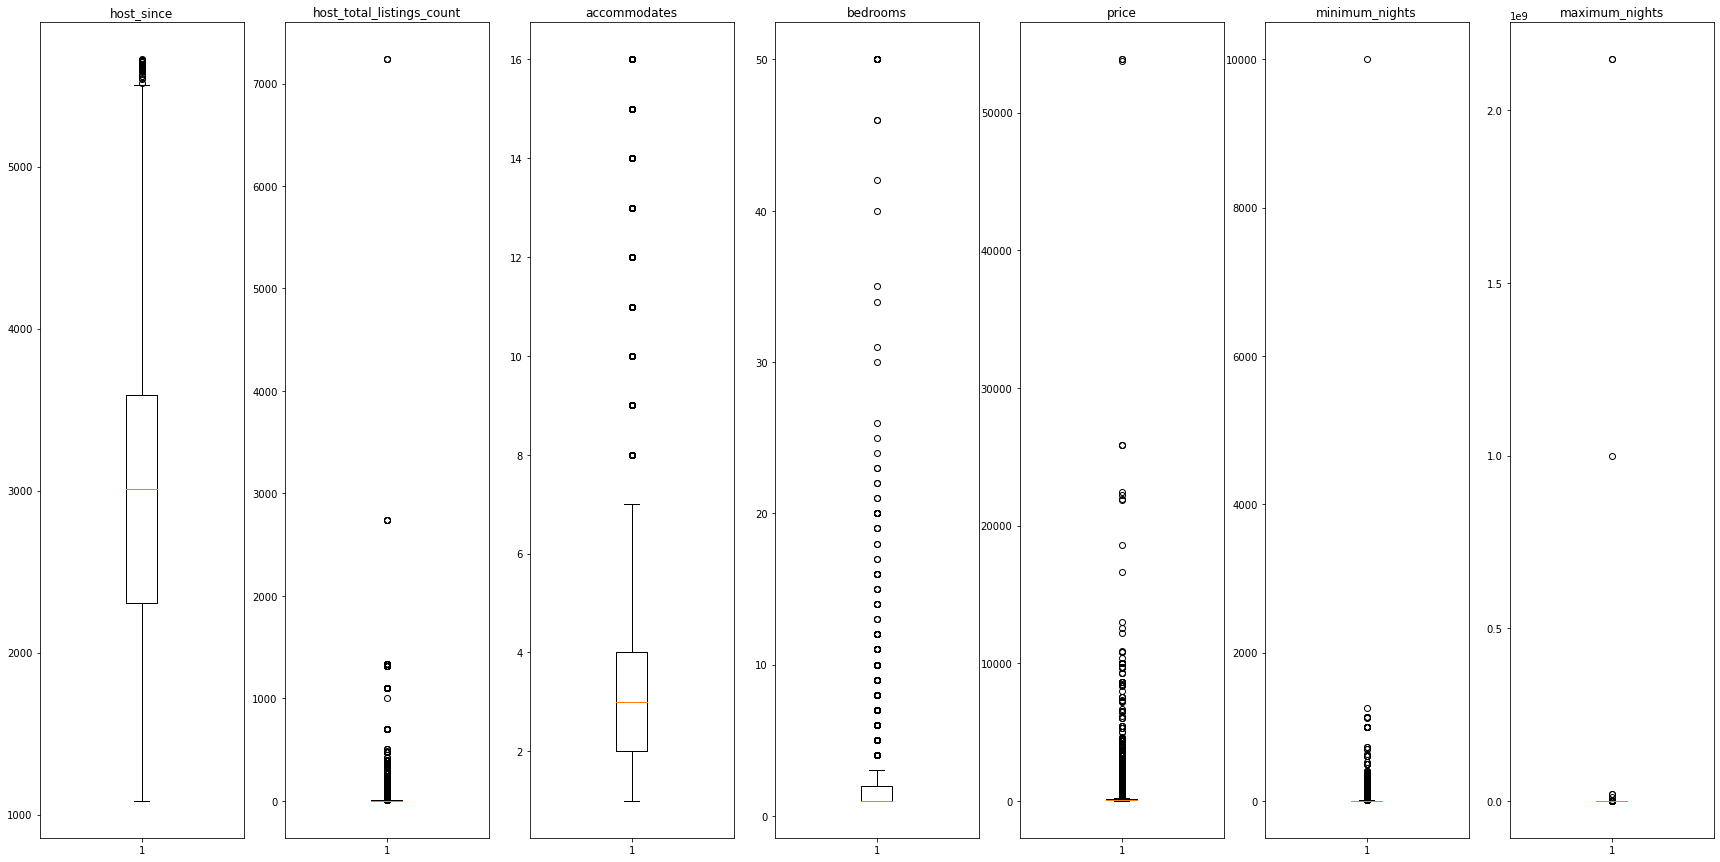

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=len(non_bin_cols), figsize=(30, 15))
for i, column in enumerate(non_bin_cols):
    axes[i].boxplot(input_df[column])
    axes[i].set_title(column)
  

From the boxplots, we can see that features such as 'host_total_listings_count,' 'price,' 'minimum_nights,' and 'maximum_nights' have extreme outliers that we can drop. We will drop the first 10 outliers of the previously notable features mentioned. We have opted not to employ the IQR method since it would excessively constrain our dataset. A better outlier analysis is a possible course of research for this project.

In [31]:
filtered_input_df = input_df[(input_df["host_total_listings_count"] < sorted(input_df["host_total_listings_count"])[-10]) & (input_df["price"] < sorted(input_df["price"])[-10]) & (input_df["minimum_nights"] < sorted(input_df["minimum_nights"])[-10]) & (input_df["maximum_nights"] < sorted(input_df["maximum_nights"])[-10])]
filtered_output_df = output_df[(input_df["host_total_listings_count"] < sorted(input_df["host_total_listings_count"])[-10]) & (input_df["price"] < sorted(input_df["price"])[-10]) & (input_df["minimum_nights"] < sorted(input_df["minimum_nights"])[-10]) & (input_df["maximum_nights"] < sorted(input_df["maximum_nights"])[-10])]


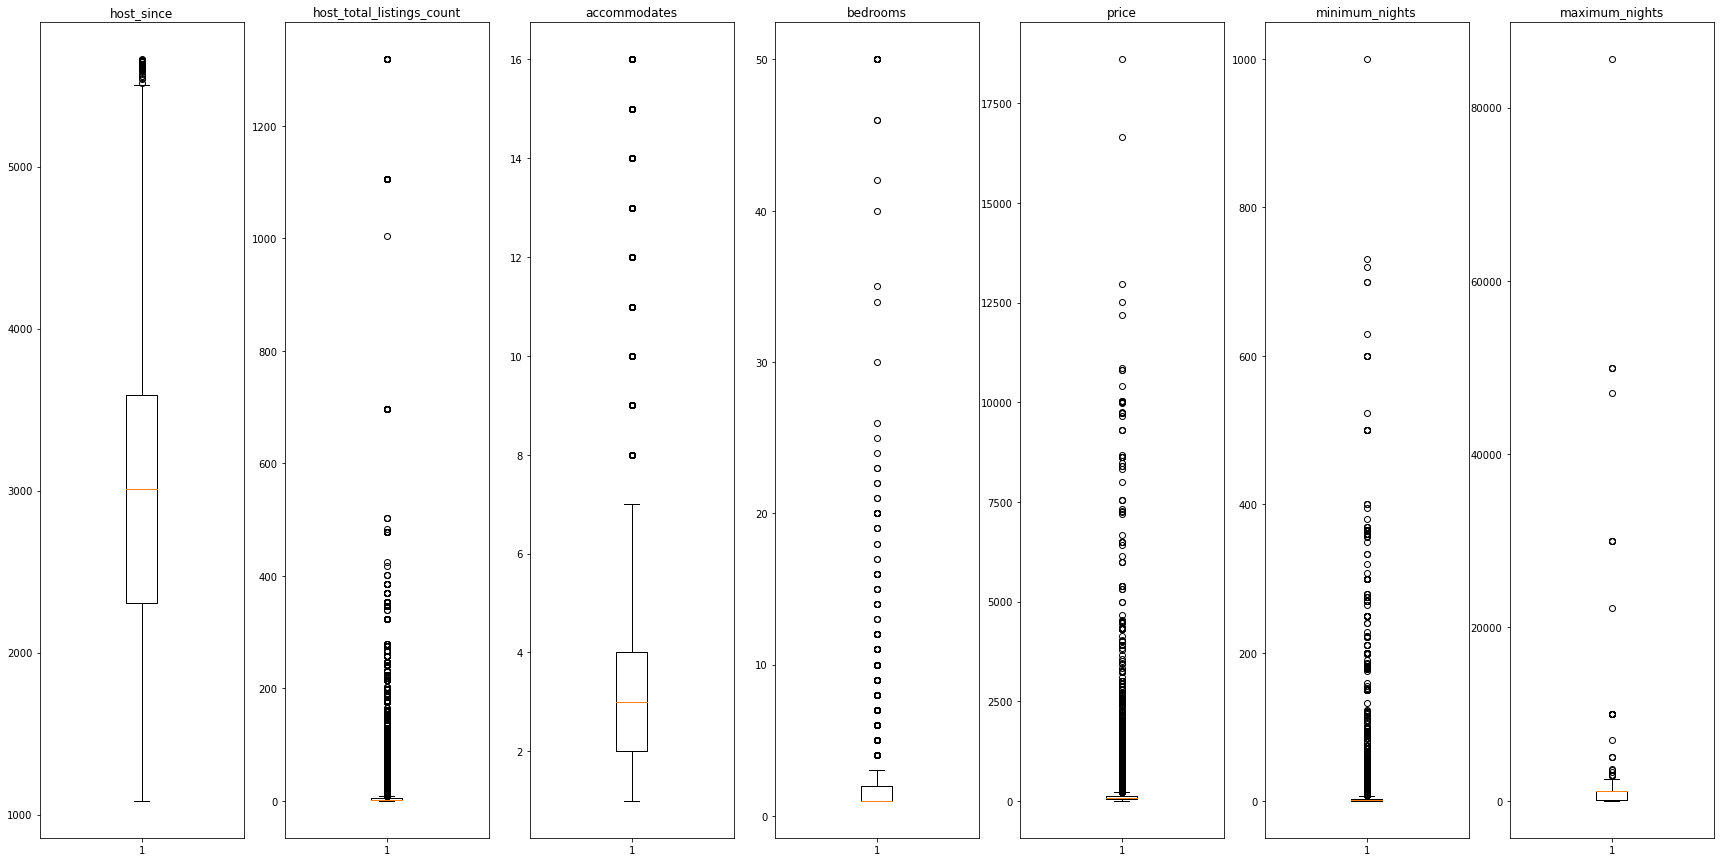

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=len(non_bin_cols), figsize=(30, 15))
for i, column in enumerate(non_bin_cols):
    axes[i].boxplot(filtered_input_df[column])
    axes[i].set_title(column)

After dropping the outliers, we can now normalize the data.

In [33]:
norm_input_df = filtered_input_df.copy()
norm_input_df[norm_input_df.columns] = (norm_input_df[norm_input_df.columns] - norm_input_df[norm_input_df.columns].min()) / (norm_input_df[norm_input_df.columns].max() - norm_input_df[norm_input_df.columns].min())
norm_input_df

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,price,minimum_nights,maximum_nights,...,Bathroom essentials,Baby safety gates,Bread maker,Clothing storage,Full kitchen,Fireplace guards,Sound system,EV charger,Outdoor furniture,Lake access
0,0.735956,0.0,0.000759,1.0,0.0,0.066667,0.0,0.002761,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.577049,0.0,0.000759,1.0,1.0,0.066667,0.0,0.006653,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.523716,0.0,0.000759,1.0,0.0,0.066667,0.0,0.004852,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.573115,0.0,0.000759,1.0,1.0,0.066667,0.0,0.003052,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.493989,0.0,0.000759,1.0,0.0,0.066667,0.0,0.003168,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,0.467760,0.0,0.000759,1.0,1.0,0.066667,0.0,0.006653,0.000000,0.000070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279708,0.577486,0.0,0.000759,1.0,1.0,0.066667,0.0,0.003168,0.006012,0.000164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279709,0.704044,0.0,0.000759,1.0,1.0,0.066667,0.0,0.002587,0.005010,0.000339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279710,0.447213,0.0,0.000759,1.0,1.0,0.066667,0.0,0.005782,0.002004,0.000199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now explore some of the correlations between the different features. Let's first look at how the non-categorical fields are correlated with each other.


<AxesSubplot:>

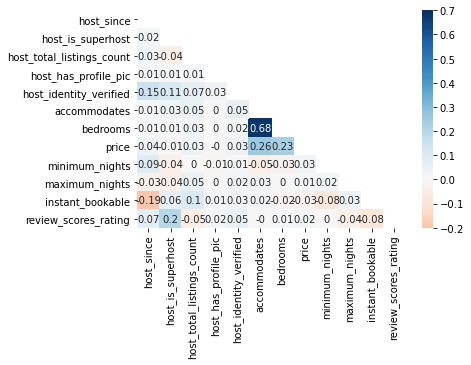

In [34]:
numeric_cols = ['host_since', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'price', 'minimum_nights', 'maximum_nights',
       'instant_bookable']
numeric_cols_df = pd.concat([norm_input_df[numeric_cols], output_df], axis=1)
corr = numeric_cols_df.corr()
matrix = np.triu(corr)
sns.heatmap(corr.round(2), vmin=-0.2, vmax=0.7, center=0, annot=True, cmap='RdBu', mask=matrix)

Out of the noncategorical features, bedrooms and accomodates have the strongest correlation, which makes sense because having more bedrooms means more room for accomodates. Of these noncategorical features, being a superhost seems to have the largest correlation with higher review score ratings.


In [35]:
import math

corrs = []
for col in norm_input_df.columns:
  corr = norm_input_df[col].corr(output_df)
  if (math.isnan(corr)):
    continue
  corrs.append([round(corr, 5), col])
corrs.sort(key = lambda x: abs(x[0]), reverse=True)
corrs[0:10]

[[0.19853, 'host_is_superhost'],
 [0.12902, 'Dishes and silverware'],
 [0.12666, 'Cooking basics'],
 [0.12548, 'Coffee maker'],
 [0.10989, 'Refrigerator'],
 [0.10641, 'Stove'],
 [0.1008, 'Oven'],
 [0.09789, 'Hot water'],
 [0.09714, 'Iron'],
 [0.09509, 'Microwave']]

It looks like being a superhost has the largest correlation to review ratings, though this doesn't necessarily imply causation. The high ratings might be the cause of being a superhost, not the other way around. The next 9 features with the strongest correlation to ratings are a variety of amenities relating to food and cooking: Dishes and silverware, Cooking basics, Coffee maker, Refrigerator, Stove, Oven, Hot water, Iron, and Microwave.